# Time Series Modeling and Forecasting

## Objective
To build a baseline time series forecasting model using ARIMA on Bitcoin
closing price data after validating stationarity and preparing the data
for forecasting.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv(
    "../data/processed/btc_usd_cleaned.csv",
    index_col=0,
    parse_dates=True
)

df.head()


In [ ]:
price_series = df['Close']

price_series.head()


In [ ]:
plt.figure(figsize=(14,6))
plt.plot(price_series)
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [ ]:
adf_result = adfuller(price_series)

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


In [ ]:
price_diff = price_series.diff().dropna()

plt.figure(figsize=(14,6))
plt.plot(price_diff)
plt.title("Differenced Bitcoin Price Series")
plt.xlabel("Date")
plt.ylabel("Price Difference")
plt.show()


In [ ]:
adf_diff = adfuller(price_diff)

print("ADF Statistic (Differenced):", adf_diff[0])
print("p-value (Differenced):", adf_diff[1])


In [ ]:
arima_model = ARIMA(price_series, order=(1,1,1))
arima_fit = arima_model.fit()

print(arima_fit.summary())


In [ ]:
forecast_steps = 30

forecast = arima_fit.forecast(steps=forecast_steps)

forecast


In [ ]:
plt.figure(figsize=(14,6))
plt.plot(price_series, label="Historical Price")
plt.plot(forecast.index, forecast, label="30-Day Forecast", color="red")
plt.title("Bitcoin Price Forecast using ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [ ]:
forecast_df = pd.DataFrame({
    "Forecasted_Close": forecast
})

forecast_df.to_csv("../data/processed/arima_forecast.csv")

print("ARIMA forecast saved successfully.")


In [12]:
# Split data into train and test
train_size = int(len(price_series) * 0.8)
train, test = price_series[:train_size], price_series[train_size:]

len(train), len(test)


(2053, 514)

In [13]:
arima_train = ARIMA(train, order=(1,1,1))
arima_train_fit = arima_train.fit()

print(arima_train_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2053
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17358.087
Date:                Sun, 11 Jan 2026   AIC                          34722.174
Time:                        20:11:46   BIC                          34739.054
Sample:                    01-01-2019   HQIC                         34728.364
                         - 08-14-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2732      0.238     -1.149      0.250      -0.739       0.193
ma.L1          0.2164      0.241      0.899      0.368      -0.255       0.688
sigma2      1.306e+06   1.92e+04     67.951      0.0

d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
test_forecast = arima_train_fit.forecast(steps=len(test))

test_forecast.head()


2024-08-15    58856.034149
2024-08-16    58823.591503
2024-08-17    58832.453783
2024-08-18    58830.032896
2024-08-19    58830.694204
Freq: D, Name: predicted_mean, dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, test_forecast))
mae = mean_absolute_error(test, test_forecast)

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 39621.30866289123
MAE: 35678.61165654257


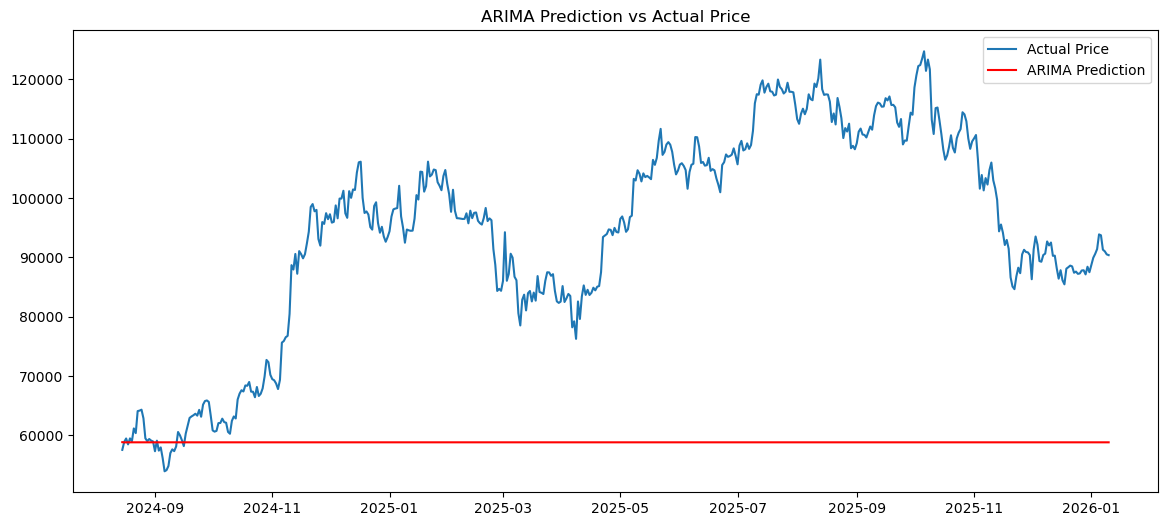

In [16]:
plt.figure(figsize=(14,6))
plt.plot(test.index, test, label="Actual Price")
plt.plot(test.index, test_forecast, label="ARIMA Prediction", color="red")
plt.title("ARIMA Prediction vs Actual Price")
plt.legend()
plt.show()
